In [20]:
#importing packages
import pandas as pd
import numpy as np

In [21]:
# Importing the dataset
nb = pd.read_csv('../Datasets/NB.csv')
nb['Fault'] = 0

ir = pd.read_csv('../Datasets/IR - 7.csv')
ir['Fault'] = 1

In [22]:
dataset = nb.append(ir)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_8788\156461942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(ir)


,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,0.135958,-0.047255,1
121151,-0.083167,-0.070882,1
121152,0.391469,-0.181005,1
121153,0.185501,0.136011,1


In [23]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [27]:
classifier = Sequential()

In [28]:
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [29]:
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [30]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [31]:
classifier.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 25)                75        
                                                                 
 dense_7 (Dense)             (None, 15)                390       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [32]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20, shuffle = False)


Epoch 1/20


C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "<frozen runpy>", line 198, in _run_module_as_main
    File "<frozen runpy>", line 88, in _run_code
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1041, in launch_instance
      app.start()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 724, in start
      self.io_loop.start()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever
      self._run_once()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1919, in _run_once
      handle._run()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 512, in dispatch_queue
      await self.process_one()
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 501, in process_one
      await dispatch(*args)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 408, in dispatch_shell
      await result
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 731, in execute_request
      reply_content = await reply_content
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 417, in do_execute
      res = shell.run_cell(
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\loaia\AppData\Local\Temp\ipykernel_8788\3603321554.py", line 1, in <module>
      model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 20, shuffle = False)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\loaia\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 1 which is outside the valid range of [0, 1).  Label values: 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1122]

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1515/1515 [==============================] - 2s 1ms/step


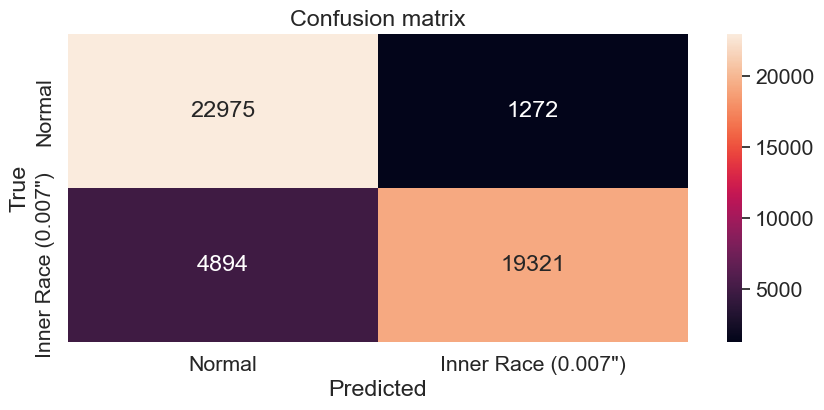

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.007")']  
columns = ['Normal', 'Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [27]:
classifier.evaluate(X_test, y_test)

1515/1515 [==============================] - 2s 967us/step - loss: 0.3052 - accuracy: 0.8728


[0.305224746465683, 0.8727663159370422]

In [20]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.007")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.82      0.95      0.88     24247
Inner Race (0.007")       0.94      0.80      0.86     24215

           accuracy                           0.87     48462
          macro avg       0.88      0.87      0.87     48462
       weighted avg       0.88      0.87      0.87     48462



In [23]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

NameError: name 'cm' is not defined

## Model B

In [66]:
classifier_b = Sequential()

In [67]:
classifier_b.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [68]:
classifier_b.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

In [69]:
classifier_b.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [70]:
classifier_b.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier_b.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                192       
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [71]:
classifier_b.fit(X_train, y_train, batch_size = 32, epochs = 20, shuffle = False)


Epoch 1/20
6058/6058 [==============================] - 9s 1ms/step - loss: 0.6701 - accuracy: 0.6857
Epoch 2/20
6058/6058 [==============================] - 9s 1ms/step - loss: 0.3431 - accuracy: 0.8655
Epoch 3/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3147 - accuracy: 0.8674
Epoch 4/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3132 - accuracy: 0.8676
Epoch 5/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3126 - accuracy: 0.8680
Epoch 6/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3123 - accuracy: 0.8682
Epoch 7/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3122 - accuracy: 0.8683
Epoch 8/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3121 - accuracy: 0.8684
Epoch 9/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.3120 - accuracy: 0.8683
Epoch 10/20
6058/6058 [==============================] - 8s 1ms/step - loss: 0.312

In [72]:
y_pred = classifier_b.predict(X_test)
y_pred = (y_pred > 0.5)

1515/1515 [==============================] - 2s 1ms/step


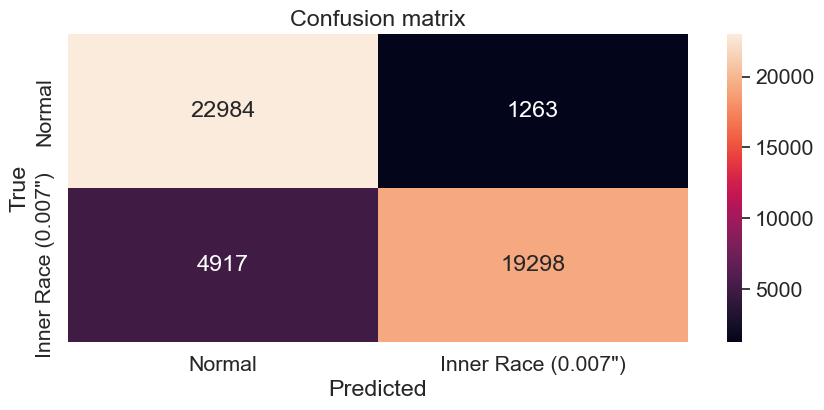

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Inner Race (0.007")']  
columns = ['Normal', 'Inner Race (0.007")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [74]:
classifier_b.evaluate(X_test, y_test)

1515/1515 [==============================] - 2s 1ms/step - loss: 0.3054 - accuracy: 0.8725


[0.3053937256336212, 0.8724774122238159]

In [1]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Inner Race (0.007")'])
print(cr)

NameError: name 'y_test' is not defined

In [76]:
normal, IR = cm
anomalies = normal[1] + IR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 6180
